Using data science methods, our team wants to solve the problem of one European company OneTwoTrip, namely, to predict the likelihood of a flight ticket return and determine the likelihood of a customer purchasing an additional service. This model can help the company: 

- Predict how many people will be on board the aircraft - calculate the aircraft load
- Reduce costs - if you predict that a person will hand over sick, then you can sell more tickets than seats on the plane
- Develop a competent financial model of the company

### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Import the data

In [2]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
df_test = pd.read_csv('onetwotrip_challenge_test.csv')
df_train.set_index("orderid", inplace=True)
df_test.set_index("orderid", inplace=True)

In [3]:
pd.options.display.max_columns = 45

In [4]:
df_train

,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
orderid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,1,0,0,9,5,20,-0.661308,1,4,1,4,1,1,1,1,15,1,1,2,1,0,4,1,1,0,1,1,0,1,0,0,0,0
1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,1,0,0,21,125,3,-0.101043,1,57,1,5,1,6,2,121,15,1,41,3,1,0,2,1,1,0,1,0,0,0,0,0,0,0
2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,1,0,1,7,4,3,-0.661308,1,4,1,2,3,6,2,17,14,1,1,11,7,0,1,1,1,0,1,1,0,0,0,0,0,0
3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,1,0,0,19,12,3,-0.521242,2,22,1,3,3,4,1,46,12,2,18,1,1,0,4,1,1,0,1,1,0,0,0,0,0,0
4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,1,0,1,16,4,3,-0.801375,1,100,1,6,1,1,1,17,22,1,1,1,1,0,3,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,1,0,1,0,91,511,0.459223,1,4,33,7,2,3,1,1,17,1,1,3,1,0,3,1,1,0,1,0,0,0,0,0,0,0
196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,1,0,0,8,5,16,-0.521242,1,0,1,5,2,5,1,1,23,1,1,12,3,0,4,1,1,0,0,0,0,0,0,0,0,0
196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,1,0,1,12,2,12,-0.101043,3,7,3,5,2,5,1,1,2,3,1,12,3,0,3,1,1,1,1,1,0,0,0,0,0,0


First of all, we noticed that our data is anonymized - that is, we do not know what each sign means. We checked if there are any gaps or NANs - no. Then we looked at how many in our data on "goal1" 0 and 1. 0 - this person did not return his ticket at the box office and flew on an airplane, 1 - this person returned the ticket to the box office. It turned out that our data has a large number of 0 and a small number of 1. At first we thought that because of this, the model get overfitting.

In [5]:
df_train['goal1'].value_counts()

0    191715
1      4341
Name: goal1, dtype: int64

Therefore, we decided to use the Logistic Regression model. But when splitting into train and test, used stratify. And use class_weight='balanced'

But the model turned out to be overfitted Therefore, we decided to try to find out what the signs mean

### Working with features
#### Work with 'field4'

In [6]:
df_train['userid'].value_counts()

a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52    363
98e3b9eba8259c0fe0599cc0490a39e8d946942abcd43fa28ba1d2872f2a462b    222
a78176edc05b37528c4b559870f1c29c5cf1b0d7b2906db8e0a323d2b83e0bf4    185
6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67    177
13a81409741819982c3bbc5452664081bfe7687c3c188ae4734d3c653985a1fa    149
                                                                   ... 
6959d17b3b92441634d0bdee92353373222a6a45faee9eb463019f9e7772caac      1
9912a0e53021e84409dd01de81f824d96d2c6b12e61de0c2924d5250cb707372      1
a299ffe1700a0e2484b2444188e64e50713852c29c7cfc56b67a39aedecefb6a      1
654088dfc28bd1b2501adefa0f90744f56e9e08a6e92091f5c9d15edfdd53467      1
4580336bef3144c1728c9e0c20c20f51da50980111ae63caf4eea1fb32278354      1
Name: userid, Length: 113902, dtype: int64

this means that there are 78149 unique users in our dataset. One user can make a purchase operation several times. 1 line equals 1 user operation

The number of users who bought a ticket more than 1 time:

In [7]:
sum(df_train['userid'].value_counts() > 1)

35753

The number of users who bought a ticket only 1 time

In [8]:
sum(df_train['userid'].value_counts() == 1)

78149

Add new feature with the number of flights to the dataset

In [9]:
c = dict(df_train['userid'].value_counts())
df_train['number_of_flights'] = df_train['userid'].apply(lambda x: c[x])

c = dict(df_test['userid'].value_counts())
df_test['number_of_flights'] = df_test['userid'].apply(lambda x: c[x])

In [10]:
df_train['number_of_flights'].max()

363

Correlation between 'number_of_flights' and other features

In [11]:
df_train.corrwith(df_train['number_of_flights'], axis=0, drop=False, method='pearson', ).sort_values()

field5              -0.224035
field2              -0.087742
field29             -0.084625
indicator_goal24    -0.077879
indicator_goal25    -0.073428
goal22              -0.069466
field3              -0.067483
field16             -0.066479
field15             -0.048916
field24             -0.044923
field6              -0.041588
field0              -0.032233
goal21              -0.029640
field28             -0.024830
field18             -0.024439
goal23              -0.019391
field20             -0.015946
goal24              -0.014246
field11             -0.014075
field9              -0.013241
goal25              -0.010806
indicator_goal21    -0.007034
field25             -0.005611
field7              -0.002221
field12             -0.000133
field10              0.000611
goal1                0.000782
field1               0.002741
field23              0.002894
field22              0.003369
field13              0.004790
field17              0.005634
field19              0.018789
indicator_

'number_of_flights' has really good correaltion with field4 0.858

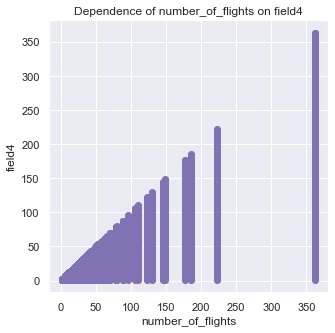

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(df_train['number_of_flights'], df_train['field4'],color='m', marker = 'o')
plt.title("Dependence of number_of_flights on field4")
plt.xlabel('number_of_flights')
plt.ylabel('field4')
plt.show()

We have a total of 363 unique values which can be repeated

In [13]:
df_train['field4'].value_counts()

1      113902
2       35753
3       15044
4        7987
5        4796
        ...  
324         1
323         1
322         1
321         1
316         1
Name: field4, Length: 363, dtype: int64

As we can see, for the first case, when 'number_of_flights' is 363, we have 363 unique values "field4", and for the second, when "number_of_flights" is 177, we have 177 unique values "field4" and they are repeated only 1 time

In [14]:
df_train['number_of_flights'].max()
h = df_train[df_train['number_of_flights'] == 363]

h.field4.value_counts()

363    1
114    1
116    1
117    1
118    1
      ..
244    1
245    1
246    1
247    1
1      1
Name: field4, Length: 363, dtype: int64

In [15]:
h = df_train[df_train['number_of_flights'] == 177]
h.field4.value_counts()

177    1
88     1
64     1
63     1
62     1
      ..
116    1
115    1
114    1
113    1
1      1
Name: field4, Length: 177, dtype: int64

Thus, "field4" is most likely the order number

### Working with features
#### Work with 'field5'

As we can see 'field5' is binary feature

In [16]:
df_train['field5'].value_counts()

1    109049
0     87007
Name: field5, dtype: int64

So we can notice what when 'field5' = 1 'field0' = 0 and 'field4' and 'field21' = 1

In [17]:
df_train.groupby(['field5']).mean()

,field0,field1,field2,field3,field4,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,number_of_flights
field5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,64.0244,-0.066941,7.078086,7.065569,6.698519,1.171630,1.249486,0.893733,0.022964,0.440263,14.563989,11.751641,27.915949,-0.027443,1.425897,14.143942,3.016481,3.780983,2.158171,3.980565,1.510315,36.845886,13.088223,1.322560,4.323054,5.239935,2.139529,0.080373,2.695611,0.993173,0.990794,0.336088,0.593952,0.600963,0.022860,0.100199,0.035802,0.018045,0.014711,0.019734,11.520452
1,0.0000,0.055050,8.700263,8.507992,1.000073,1.902072,1.277903,0.867903,0.024714,0.454383,14.688837,12.217022,26.351943,0.025171,1.589964,16.984420,2.989188,3.836642,2.010747,4.004292,1.000000,40.272721,12.980284,1.470137,5.402498,2.787362,1.433016,0.095113,3.208411,0.996396,0.970756,0.358719,0.687086,0.684967,0.047612,0.223138,0.041037,0.026089,0.015406,0.024063,1.699548


In [18]:
df_train_f5_0 = df_train[df_train['field5'] == 0]
df_train_f5_1 = df_train[df_train['field5'] == 1]

In [19]:
df_train_f5_1['field0'].value_counts()

0    109049
Name: field0, dtype: int64

In [20]:
df_train_f5_1['field4'].value_counts()

1    109041
2         8
Name: field4, dtype: int64

In [21]:
df_train_f5_1['field21'].value_counts()

1    109049
Name: field21, dtype: int64

In [22]:
df_train_f5_0['field0'].value_counts()

0      17802
1       3457
2       2374
3       2063
4       1832
       ...  
463        1
452        1
462        1
477        1
454        1
Name: field0, Length: 486, dtype: int64

In [23]:
df_train_f5_0['field4'].value_counts()

2      35745
3      15044
4       7987
1       4861
5       4796
       ...  
276        1
235        1
299        1
363        1
319        1
Name: field4, Length: 363, dtype: int64

In [24]:
df_train_f5_0['field21'].value_counts()

2    44401
1    42606
Name: field21, dtype: int64

In [25]:
df_train[df_train['field5'] == 1]['field4'].value_counts()

1    109041
2         8
Name: field4, dtype: int64

There is a possibility that "field5" is a sign of the first order

### Working with features
#### Work with 'field1'

Features 'indicator_goal21' - 'indicator_goal25', 'goal21 - goal25' refer to the purchase of additional services. Therefore, they should be well correlated with the price. There is an assumption that 'field1' is the price, but normalized

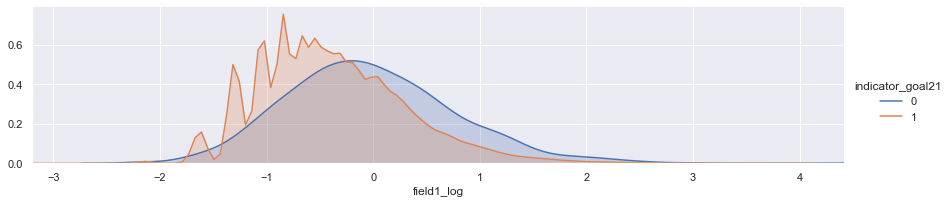

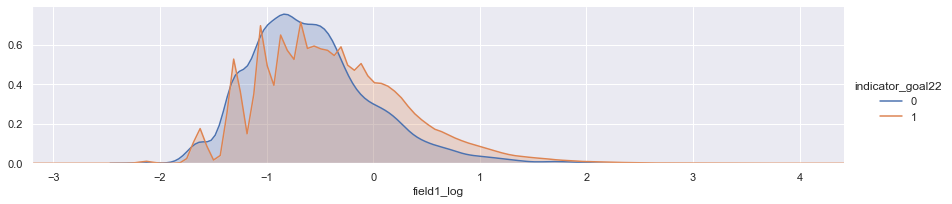

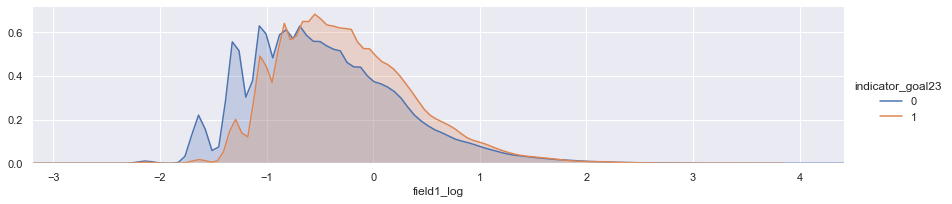

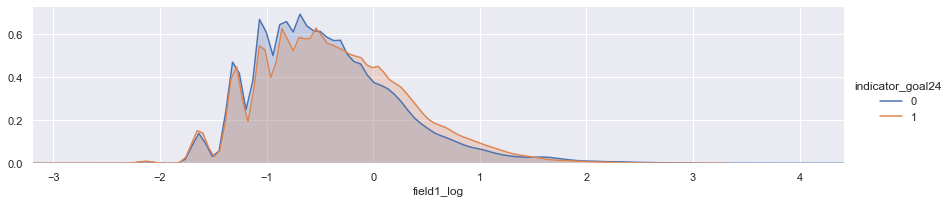

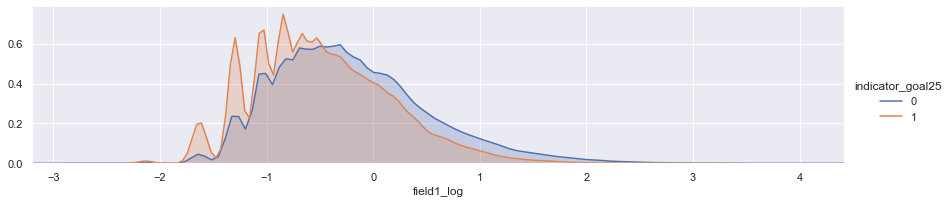

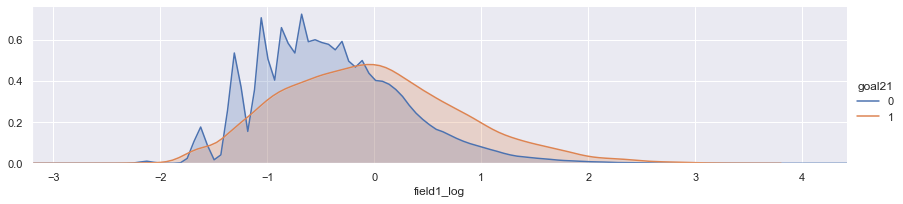

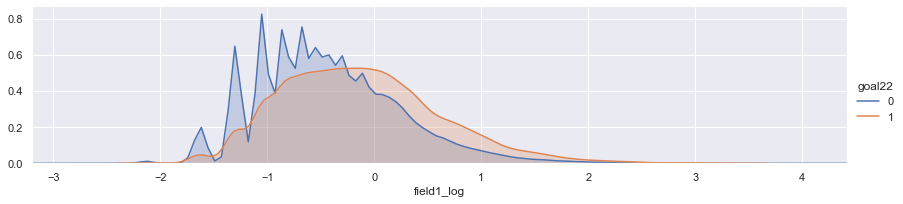

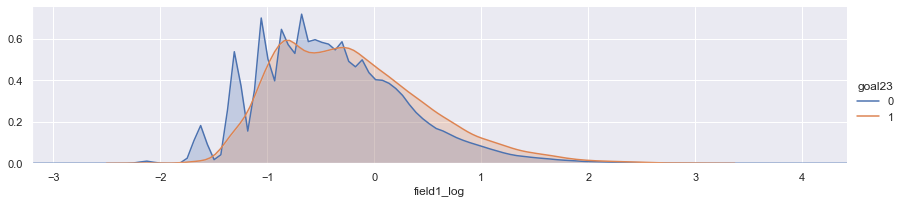

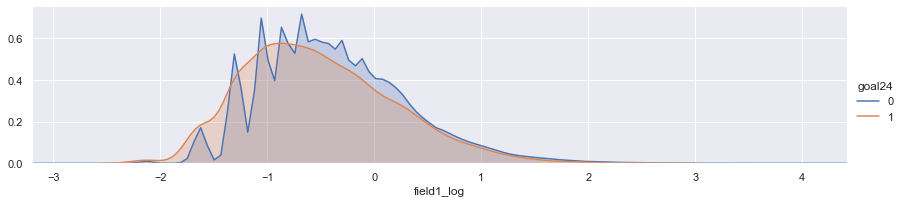

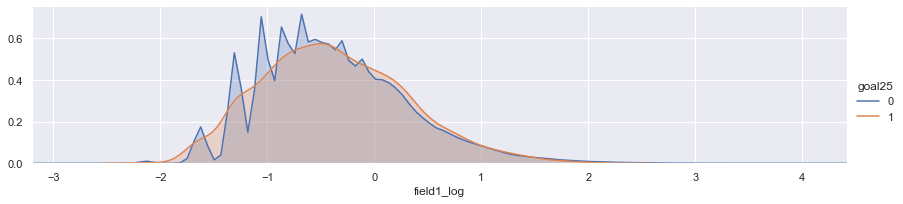

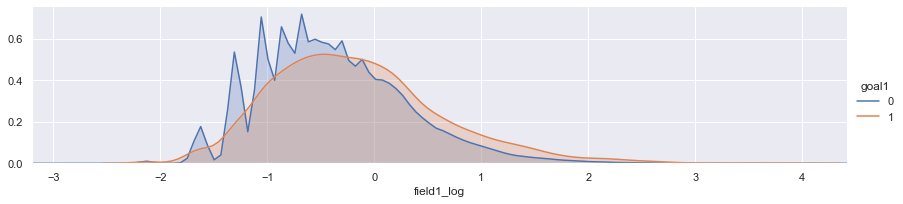

In [26]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue = target, aspect = 4, row = row, col = col)
    facet.map(sns.kdeplot, var, shade = True)
    facet.set(xlim = (df[var].min(), df[var].max()))
    facet.add_legend()
    plt.show()

goals = ['indicator_goal21', 'indicator_goal22', 'indicator_goal23', 'indicator_goal24', 'indicator_goal25',
         'goal21', 'goal22', 'goal23', 'goal24', 'goal25', 'goal1']
indicators_goals = ['indicator_goal21', 'indicator_goal22', 'indicator_goal23', 'indicator_goal24',
                    'indicator_goal25']

df_train['field1_log'] = np.log(df_train['field1'] + 0.9)
for column in goals:
    plot_distribution(df_train, 'field1_log', column)

According to the graphs, it can be estimated that if the number of services increases, then 'field1' also increases, so that 'field1' is the price, but normalized

### New feature generating
#### Work with 'field1' and 'field15'

I found a small piece of code that proves that 'field15' is the number of tickets purchased by the user. That is, one line is not a purchase of one ticket, but one purchase, where tickets can be from 1 to 18

In [27]:
df_train['field15'].value_counts()

1     129491
2      48023
3       8387
4       7550
6       1215
5        735
8        390
7         97
10        96
9         32
12        23
14         7
16         6
18         3
13         1
Name: field15, dtype: int64

As you can see from the screenshot, the maximum number of tickets can be purchased on the site - 9 pieces one way. Accordingly, if you take 9 tickets in two directions, you get 18

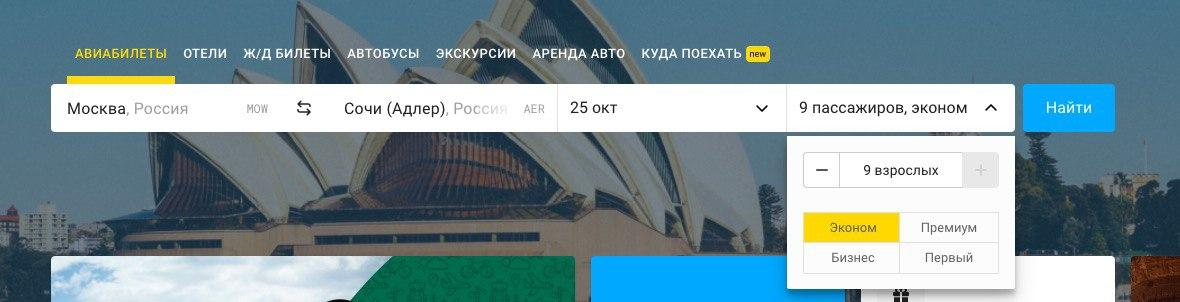

In [28]:
from IPython.display import Image
Image(filename='photo_2020-10-22_02-06-44.jpg') 

A snippet of code confirming that 'field15' could potentially be the number of tickets purchased by the user:

In [29]:
df_train['field_15_1'] = df_train['field1'] / df_train['field15']
df_test['field_15_1'] = df_test['field1'] / df_test['field15']
df_full = pd.concat([df_train, df_test])

### New feature generating
#### Work with 'field2' and 'field3'

In [30]:
df_train[['field2', 'field3']]

,field2,field3
orderid,,
0,11,12
1,5,7
2,2,3
3,10,11
4,8,11
...,...,...
196051,7,7
196052,11,11
196053,9,9


My guess is that 'field2' and 'field3' are months. Let's see if we can find out what they mean

In [31]:
for_user = df_train[df_train['userid'] == 'a4837464e50075c4f8b5820dab011496ba1f04a985ab2782f5cafe6dda94ed52']
for_user.sort_values(by=['field4'], inplace = True)
for_user.head(10)

<ipython-input-31-579a68337881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_user.sort_values(by=['field4'], inplace = True)


,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,number_of_flights,field1_log,field_15_1
orderid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
162877,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.548937,6,6,1,1,0,1,1,0,0,14,8,5,-0.521242,1,1,1,2,2,3,1,16,8,1,1,12,3,0,2,1,1,1,0,0,0,0,0,0,0,0,363,-1.046789,-0.548937
125446,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.161080,6,6,2,0,0,1,1,0,1,15,9,3,0.179090,1,1,1,2,1,3,1,16,8,1,1,4,2,0,2,1,1,1,0,0,0,0,0,0,0,0,363,-0.302566,-0.161080
39421,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.626508,6,6,3,0,0,1,1,0,0,15,8,2,-0.661308,1,1,1,2,2,3,1,17,20,1,1,12,3,0,2,1,1,1,0,1,0,0,0,0,0,0,363,-1.296483,-0.626508
174386,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,16,-0.005937,6,6,4,0,0,1,1,0,1,10,4,2,0.319156,1,4,1,4,2,1,1,1,7,1,1,12,3,0,2,1,0,0,1,1,0,0,0,0,0,0,363,-0.111979,-0.005937
83155,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.083509,6,6,5,0,0,1,1,0,1,10,9,3,0.319156,1,5,1,4,2,2,1,16,18,1,1,12,3,0,2,1,1,1,1,0,0,0,0,0,0,1,363,-0.202739,-0.083509
186621,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,1,0.149205,6,6,6,0,0,1,1,0,1,16,9,4,0.599289,1,5,1,5,2,3,1,16,15,1,1,12,3,0,2,1,1,1,1,0,0,0,0,0,0,0,363,0.048033,0.149205
102930,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.083509,6,6,7,0,0,1,0,0,1,17,9,2,0.319156,1,8,1,5,2,6,1,20,22,1,1,12,3,0,2,1,1,1,1,0,0,0,0,0,0,0,363,-0.202739,-0.083509
189031,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,3,-0.471365,6,6,8,0,0,1,1,0,0,13,8,2,-0.521242,1,3,1,1,2,4,1,17,16,1,1,12,3,0,2,1,1,1,1,1,0,0,0,0,0,0,363,-0.847150,-0.471365
177676,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.471365,6,6,9,0,0,1,1,0,1,13,2,5,-0.381176,1,4,1,1,2,5,1,1,19,1,1,12,3,0,2,1,1,1,1,1,0,0,0,0,0,0,363,-0.847150,-0.471365


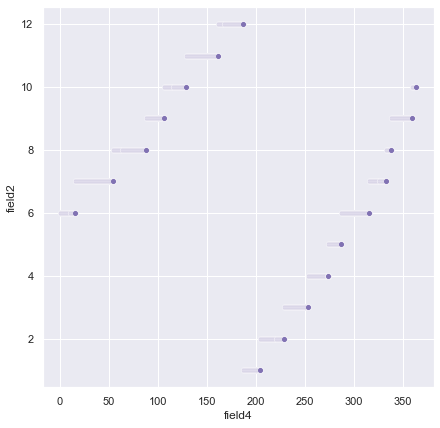

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='field4', y='field2', data=for_user, ax=ax, color='m')

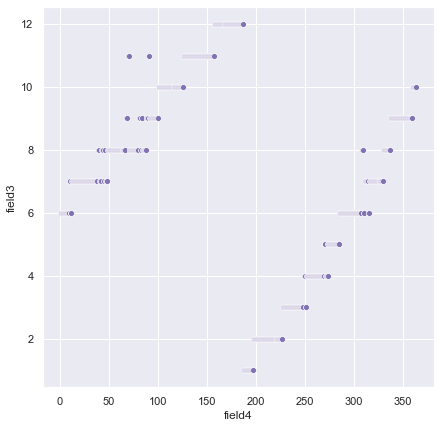

In [33]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x='field4', y='field3', data=for_user, ax=ax, color='m')

As we can see, the graphs are quite similar to each other. Also, we see that the values ​​are from 1 to 12, which means this is months. Considered two years

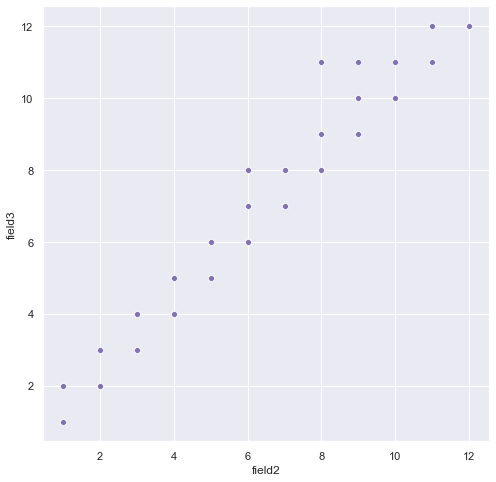

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='field2', y='field3', data=for_user, ax=ax, color = 'm');

In [35]:
((df_train['field3'] - df_train['field2']) % 12).value_counts()

0     127457
1      51000
2      10998
3       3688
4       1364
5        668
6        402
7        221
8        122
9         90
10        35
11        11
dtype: int64

In [36]:
((df_test['field3'] - df_test['field2']) % 12).value_counts()

0     296104
1     118570
2      25299
3       8510
4       3065
5       1481
6        923
7        496
8        289
9        193
10        64
11        17
dtype: int64

In [37]:
df_train.loc[:,['field2', 'field3']]

,field2,field3
orderid,,
0,11,12
1,5,7
2,2,3
3,10,11
4,8,11
...,...,...
196051,7,7
196052,11,11
196053,9,9


From the graph you can see that "field3" is greater than "field2"
Thus, if this is a month, it may be that "field2" is the month of purchase, and "field3" is the month of departure of the aircraft

In [38]:
df_train['field_3_2'] = (df_train['field3'] - df_train['field2']) % 12
df_test['field_3_2'] = (df_test['field3'] - df_test['field2']) % 12
df_full = pd.concat([df_train, df_test])

month_order_fly has a very high correlation with field16 0.92

In [39]:
df_train.corr()[['field_3_2']].sort_values(by='field_3_2', ascending=False).transpose()

,field_3_2,field16,field6,field1,field1_log,field25,field_15_1,field7,field15,field24,field22,field14,field12,indicator_goal24,field17,field10,field28,goal22,indicator_goal23,goal1,field13,goal21,field5,goal24,field11,field20,goal25,field18,goal23,field9,field27,field2,field0,indicator_goal25,field26,indicator_goal21,field29,indicator_goal22,field21,field23,field4,number_of_flights,field19,field3,field8
field_3_2,1.0,0.920071,0.201648,0.183857,0.18146,0.170102,0.169429,0.157089,0.138367,0.131462,0.131361,0.125379,0.123158,0.107433,0.074388,0.072841,0.072381,0.061781,0.057352,0.057199,0.050592,0.046386,0.045507,0.042185,0.038056,0.02074,0.020634,0.017887,0.012936,0.011663,0.010775,-0.000551,-0.002024,-0.003334,-0.004318,-0.005413,-0.009303,-0.017959,-0.042674,-0.049685,-0.051861,-0.059541,-0.060432,-0.097906,-0.207911


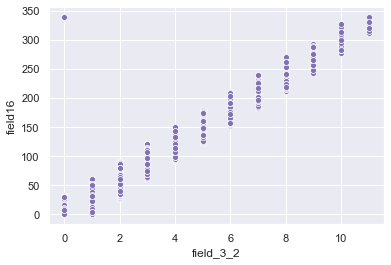

In [40]:
sns.scatterplot(x='field_3_2', y='field16', data=df_train, color = 'm');

There is an assumption that "field16" is the difference between two dates (days). Most likely the difference between the day of purchase and the day of departure

In [41]:
f = (df_train[~((df_train['field_3_2'] == 0) & (df_train['field16'] > 300))])

In [42]:
f = f.groupby(['field_3_2']).agg(['min', 'max', 'mean', 'std'])

In [43]:
f[['field16']]

field16                            
              min  max        mean        std
field_3_2                                    
0               0   31    4.914418   5.285364
1               1   61   20.931373  12.984255
2              29   91   56.290053  12.577488
3              62  121   87.415672  12.506399
4              93  151  118.771261  12.492305
5             123  180  149.079341  12.708518
6             152  210  179.619403  12.845598
7             183  239  207.194570  11.688112
8             213  271  238.393443  12.411377
9             244  293  270.111111  10.384133
10            278  328  300.200000  11.901063
11            312  340  326.454545   9.842394

### New feature generating
#### Work with 'field18' and 'field20'

the values of field18 and field20 are in the range from 1 to 7. These may be days of the week (Mon, Tue, Wed, Thu, Fri, Sat, Sun)

In [44]:
df_train['field18'].unique()

array([4, 5, 2, 3, 6, 1, 7], dtype=int64)

In [45]:
df_train['field20'].unique()

array([1, 6, 4, 3, 2, 7, 5], dtype=int64)

In [46]:
f = df_train.groupby(['field18']).agg(['min', 'max', 'mean', 'std'])

f = np.array([[1, -0.106876], [2, -0.097760], [3, -0.102271], [4, -0.096749], 
              [5, -0.099813], [6, -0.110241], [7, -0.114732]])

f = pd.DataFrame(data=f, columns=["days", "price_mean"])

f

,days,price_mean
0,1.0,-0.106876
1,2.0,-0.097760
2,3.0,-0.102271
3,4.0,-0.096749
4,5.0,-0.099813
5,6.0,-0.110241
6,7.0,-0.114732


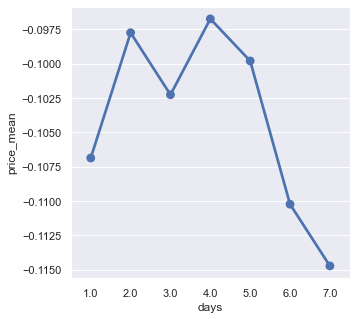

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.pointplot(x='days', y='price_mean', data=f, ax=ax);

In [48]:
f = df_train.groupby(['field20']).agg(['min', 'max', 'mean', 'std'])

f = np.array([[1, -0.115952], [2, -0.126493], [3, -0.113682], [4, -0.105046], 
              [5, -0.080378], [6, -0.081619], [7, -0.103494]])

f = pd.DataFrame(data=f, columns=["days", "price_mean"])

f

,days,price_mean
0,1.0,-0.115952
1,2.0,-0.126493
2,3.0,-0.113682
3,4.0,-0.105046
4,5.0,-0.080378
5,6.0,-0.081619
6,7.0,-0.103494


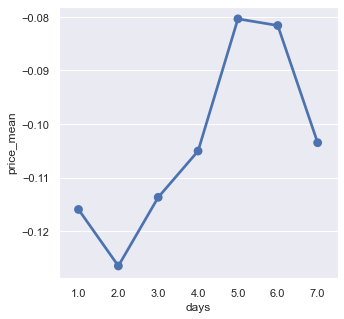

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.pointplot(x='days', y='price_mean', data=f, ax=ax);

Most likely "field20" is the day of the week on which the plane departs, because the price on Friday and Saturday is higher than on all other days

In [50]:
for_user

,userid,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,field10,field11,field12,field13,field14,field15,field16,field17,field18,field19,field20,field21,field22,field23,field24,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,number_of_flights,field1_log,field_15_1
orderid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
162877,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.548937,6,6,1,1,0,1,1,0,0,14,8,5,-0.521242,1,1,1,2,2,3,1,16,8,1,1,12,3,0,2,1,1,1,0,0,0,0,0,0,0,0,363,-1.046789,-0.548937
125446,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.161080,6,6,2,0,0,1,1,0,1,15,9,3,0.179090,1,1,1,2,1,3,1,16,8,1,1,4,2,0,2,1,1,1,0,0,0,0,0,0,0,0,363,-0.302566,-0.161080
39421,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.626508,6,6,3,0,0,1,1,0,0,15,8,2,-0.661308,1,1,1,2,2,3,1,17,20,1,1,12,3,0,2,1,1,1,0,1,0,0,0,0,0,0,363,-1.296483,-0.626508
174386,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,16,-0.005937,6,6,4,0,0,1,1,0,1,10,4,2,0.319156,1,4,1,4,2,1,1,1,7,1,1,12,3,0,2,1,0,0,1,1,0,0,0,0,0,0,363,-0.111979,-0.005937
83155,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,0,-0.083509,6,6,5,0,0,1,1,0,1,10,9,3,0.319156,1,5,1,4,2,2,1,16,18,1,1,12,3,0,2,1,1,1,1,0,0,0,0,0,0,1,363,-0.202739,-0.083509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68479,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,2,0.071634,9,9,359,0,0,1,1,0,0,17,9,3,-0.521242,3,1,1,1,3,2,2,16,20,3,1,5,3,0,3,1,1,1,0,0,0,0,0,0,0,0,363,-0.028776,0.023878
77006,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,12,-0.083509,10,10,360,0,0,1,1,0,0,11,2,2,0.319156,1,3,1,6,3,2,2,1,8,1,1,5,3,0,4,1,1,1,1,1,0,0,0,0,0,0,363,-0.202739,-0.083509
97209,a4837464e50075c4f8b5820dab011496ba1f04a985ab27...,2,-0.238651,10,10,361,0,0,1,1,0,0,10,9,2,0.039024,1,3,1,1,3,4,2,1,6,1,1,5,3,0,4,1,1,1,1,0,0,0,0,0,0,0,363,-0.413474,-0.238651


In [51]:
f = df_train[df_train['number_of_flights'] == 177]

In [52]:
f.userid.unique()

array(['6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67'],
      dtype=object)

In [53]:
f = df_train[df_train['userid'] == '6f88521de0b6c0f34e8c6675387055bc4b62331e681b5676549cadd149073f67']

In [54]:
f = f[['field2', 'field3', 'field18', 'field20', 'field_3_2']]

In [55]:
f['days_20_18'] = (f['field20'] - f['field18']) % 7

In [56]:
f

,field2,field3,field18,field20,field_3_2,days_20_18
orderid,,,,,,
1753,2,2,1,2,0,1
2250,10,12,2,5,2,3
3743,9,9,5,1,0,3
4460,12,12,6,6,0,0
4849,11,11,5,7,0,2
...,...,...,...,...,...,...
187168,2,3,4,4,1,0
187638,7,8,2,6,1,4
187991,9,9,2,4,0,2


So

"field18" and "month_of_order" are linked together. Most likely yes "field18" is the day of the week, "month_of_order" is the month of the first day (most likely, this is the date of purchase or checkout)

"field20" and "month_of_fly" are also related, "field20" is the day of the week, "month_of_fly" is the month (most likely the plane is taking off)

In [57]:
df_train['field_18_20'] = (df_train['field18'] - df_train['field20']) % 7
df_test['field_18_20'] = (df_test['field18'] - df_test['field20']) % 7

df_full = pd.concat([df_train, df_test])

In [58]:
df_train.drop(['goal21', 'goal22' ,'goal23', 'goal24', 'goal25', 'field1_log'], axis=1, inplace=True)

In [59]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [60]:
# Splitting the data frame into X (inputs) and y (outputs):

In [61]:
X = df_train.drop(columns=['goal1', 'userid'], axis=1)
y = df_train['goal1']
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [62]:
# Logistic regression:

In [63]:
lgr = LogisticRegression(penalty='l2', class_weight='balanced')
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
yp_pred_lgr = lgr.predict_proba(X_test)[:,1]

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
cv_scores_lgr = cross_val_score(lgr, X, y, cv=5, scoring='roc_auc')
print(f"{round(cv_scores_lgr.mean(), 3)} ± {round(cv_scores_lgr.std(), 3)}")

C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.662 ± 0.01


C:\Users\Kundyz Onlabek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# Random forest classifier:

In [66]:
forest = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42, class_weight='balanced') 
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
yp_pred_forest = forest.predict_proba(X_test)[:,1]

In [67]:
cv_scores_forest = cross_val_score(forest, X, y, cv=5, scoring='roc_auc')
print(f"{round(cv_scores_forest.mean(), 3)} ± {round(cv_scores_forest.std(), 3)}")

0.651 ± 0.011


In [68]:
# Decision tree classifier:

In [69]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=43, class_weight='balanced')
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
yp_pred_dtc = dtc.predict_proba(X_test)[:,1]

In [70]:
cv_scores_dtc = cross_val_score(dtc, X, y, cv=5, scoring='roc_auc')
print(f"{round(cv_scores_dtc.mean(), 3)} ± {round(cv_scores_dtc.std(), 3)}")

0.602 ± 0.006


In [71]:
# XGBoost:

In [72]:
boost = XGBClassifier(max_depth=6, learning_rate=0.007, n_estimators=3000, reg_lambda=5.5, reg_alpha=1.2, class_weight='balanced')
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
yp_pred_boost = boost.predict_proba(X_test)[:,1]
boost.save_model('final.model')

[03:24:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [73]:
cv_scores_boost = cross_val_score(boost, X, y, cv=5, scoring='roc_auc')
print(f"{round(cv_scores_boost.mean(), 3)} ± {round(cv_scores_boost.std(), 3)}")

[03:27:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:31:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:34:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in la

In [74]:
# Counting probability:

In [75]:
proba = pd.DataFrame(yp_pred_boost, columns=['proba'])

In [76]:
proba

,proba
0,0.020510
1,0.018814
2,0.010910
3,0.022618
4,0.018046
...,...
39207,0.008616
39208,0.020837
39209,0.009068
39210,0.006232


In [77]:
# Counting probability for the 'test' values:

In [78]:
X1 = df_test.drop(columns=['userid'], axis=1)

In [79]:
boost = XGBClassifier(max_depth=6, learning_rate=0.007, n_estimators=3000, reg_lambda=5.5, reg_alpha=1.2, class_weight='balanced')
boost.load_model('final.model')
yp_pred_boost2 = boost.predict_proba(X1)[:,1]

In [80]:
yp_pred_boost2

array([0.01172942, 0.00758021, 0.03141584, ..., 0.01516093, 0.03599426,
       0.00939851], dtype=float32)

In [81]:
probability = pd.DataFrame(yp_pred_boost2, columns=['probability'])

In [82]:
probability['probability'] = round(probability['probability'], 3)

In [83]:
probability.describe()

,probability
count,455011.000000
mean,0.021874
std,0.021192
min,0.001000
25%,0.010000
50%,0.016000
75%,0.027000
max,0.712000
